In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts, cross_val_score
from sklearn.metrics import mean_squared_error

In [12]:
import os
os.chdir("D:/GreyAtom/Datasets/09292018")

gm2008 = pd.read_csv("gm_2008_region.csv")
gm2008.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


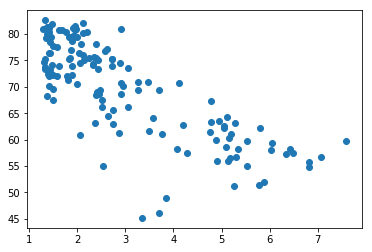

In [13]:
X = gm2008["fertility"]
y = gm2008["life"]

plot.scatter(X, y)

In [14]:
linreg = LinearRegression()

y = y.values.reshape(-1, 1)
X = X.values.reshape(-1, 1)

In [15]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
y_pred = linreg.predict(X)
y_pred

array([[70.82542398],
       [54.38307171],
       [73.00292468],
       [76.73578303],
       [74.2472108 ],
       [76.69134424],
       [74.11389443],
       [74.55828233],
       [72.38078162],
       [74.82491507],
       [76.64690545],
       [74.86935386],
       [70.02552576],
       [59.53797134],
       [71.80307735],
       [67.49251473],
       [70.24771971],
       [74.51384354],
       [76.60246666],
       [56.11618452],
       [54.16087776],
       [69.4033827 ],
       [59.98235924],
       [75.49149691],
       [52.6943977 ],
       [74.55828233],
       [72.15858767],
       [60.51562472],
       [60.29343077],
       [74.46940475],
       [61.13776778],
       [76.60246666],
       [76.29139513],
       [74.55828233],
       [66.24822862],
       [70.82542398],
       [69.8477706 ],
       [72.64741436],
       [59.36021618],
       [60.02679803],
       [75.75812965],
       [70.78098519],
       [74.73603749],
       [74.20277201],
       [63.93741154],
       [57

In [18]:
gm2008["life"]

0      75.3
1      58.3
2      75.5
3      72.5
4      81.5
5      80.4
6      70.6
7      72.2
8      68.4
9      75.3
10     70.1
11     79.4
12     70.7
13     63.2
14     67.6
15     70.9
16     61.2
17     73.9
18     73.2
19     59.4
20     57.4
21     66.2
22     56.6
23     80.7
24     54.8
25     78.9
26     75.1
27     62.6
28     58.6
29     79.7
       ... 
109    76.4
110    55.9
111    80.9
112    74.8
113    78.5
114    56.7
115    55.0
116    81.1
117    74.3
118    67.4
119    69.1
120    46.1
121    81.1
122    81.9
123    69.5
124    59.7
125    74.1
126    60.0
127    71.3
128    76.5
129    75.1
130    57.2
131    68.2
132    79.5
133    78.2
134    76.0
135    68.7
136    75.4
137    52.0
138    49.0
Name: life, Length: 139, dtype: float64

In [19]:
linreg.score(X, y)

0.6192442167740035

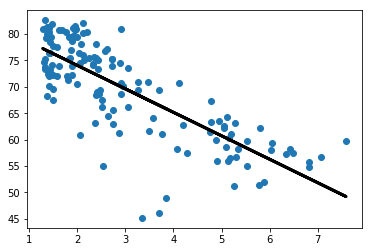

In [24]:
plot.scatter(X, y)
plot.plot(X, y_pred, color='Black', linewidth=3)
plot.show()

In [27]:
gm2008 = pd.read_csv("gm_2008_region.csv")
gm2008 = gm2008.drop(["Region"], axis = 1)
gm2008.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [30]:
X = gm2008.drop(["life"], axis=1)
y = gm2008["life"]


In [31]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 43)

In [35]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y_pred = reg_all.predict(X_test)

In [41]:
reg_all.score(X_test, y_test)

0.8852965321157262

In [43]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

2.942513452989919

In [45]:
reg = LinearRegression()

cvscores_3 = cross_val_score(reg, X, y,cv = 3)
print(np.mean(cvscores_3))

cvscores_10 = cross_val_score(reg, X, y,cv = 10)
print(np.mean(cvscores_10))

0.8718712782622258
0.8436128620131369


In [48]:
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X, y)
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]
